<a href="https://colab.research.google.com/github/UdayLab/intro2BigData/blob/main/class_7/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Air Pollution Data Produced Throughout Japan Using K-Means Algorithms

## Step 1: Download the air pollution dataset

In [1]:
!wget -N https://raw.githubusercontent.com/UdayLab/intro2BigData/main/class_7/aeros_PM25Data.csv

--2023-12-30 05:02:42--  https://raw.githubusercontent.com/UdayLab/intro2BigData/main/class_7/aeros_PM25Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8507 (8.3K) [text/plain]
Saving to: ‘aeros_PM25Data.csv’

aeros_PM25Data.csv  100%[===================>]   8.31K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2023-12-30 05:02:42 (55.8 MB/s) - ‘aeros_PM25Data.csv’ saved [8507/8507]



---

## Step 2 : Read the air polluition data from a CSV file to a dataframe

In [31]:
import pandas as pd
df=pd.read_csv("aeros_PM25Data.csv")

df.head() # Printing the partial contents of the dataframe

,Unnamed: 0,TimeStamp,(140.7468006 41.8188869),(140.4396435 40.5942053),(141.7627117 40.1916885),(140.8733429 38.2932172),(140.957261 37.6422006),(140.5346664 36.3965854),(140.4021967 36.555081),(139.9744275 35.9510748),...,(135.790301 34.509211),(135.7079001 34.6916695),(133.7758944 34.6007931),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441),(132.2165637 34.1698473),(130.601994 32.507843),(130.6384926 32.5010333),(127.7235186 26.2674837)
0,0,2022-04-01 01:00:00,9.0,NaN,NaN,NaN,3.0,NaN,6.0,NaN,...,5.0,7.0,NaN,2.0,8.0,4.0,NaN,NaN,NaN,NaN
1,1,2022-04-01 02:00:00,0.0,NaN,NaN,NaN,0.0,NaN,8.0,NaN,...,4.0,8.0,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN
2,2,2022-04-01 03:00:00,2.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,8.0,3.0,NaN,2.0,11.0,4.0,NaN,NaN,NaN,NaN
3,3,2022-04-01 04:00:00,4.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,8.0,3.0,NaN,1.0,11.0,5.0,NaN,NaN,NaN,NaN
4,4,2022-04-01 05:00:00,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,5.0,4.0,NaN,1.0,8.0,5.0,NaN,NaN,NaN,NaN


In [32]:
df.shape # Checking the shape of the dataframe

(40, 42)

---

## Step 3: Data Wrangling (Data Preprocessing + Data Transformation)



1.   Removing TimeStamp Column
2.   Removing Unnamed Columns with no sensor locations
3.   Removing the columns that have missing pixels more than 5%
4.   Create a new variable to store the column information of the sensors
5.   Fillup the missing values in the dataframe using Mean Imputation
6.   __Transpose the dataframe to perform clustering__



### Step 3.1 Removing TimeStamp Column

In [33]:
df.drop(['TimeStamp'], axis=1,inplace =True)

### Step 3.2: Removing Unnamed Columns

In [34]:
sensorsWithPointInformation = [col for col in df if 'Unnamed' in col]
df.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
df.head()

,(140.7468006 41.8188869),(140.4396435 40.5942053),(141.7627117 40.1916885),(140.8733429 38.2932172),(140.957261 37.6422006),(140.5346664 36.3965854),(140.4021967 36.555081),(139.9744275 35.9510748),(139.7422865 36.2305774),(139.0960211 36.4047323),...,(135.790301 34.509211),(135.7079001 34.6916695),(133.7758944 34.6007931),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441),(132.2165637 34.1698473),(130.601994 32.507843),(130.6384926 32.5010333),(127.7235186 26.2674837)
0,9.0,NaN,NaN,NaN,3.0,NaN,6.0,NaN,NaN,NaN,...,5.0,7.0,NaN,2.0,8.0,4.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,0.0,NaN,8.0,NaN,NaN,NaN,...,4.0,8.0,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,8.0,3.0,NaN,2.0,11.0,4.0,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,...,8.0,3.0,NaN,1.0,11.0,5.0,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,5.0,4.0,NaN,1.0,8.0,5.0,NaN,NaN,NaN,NaN


In [35]:
df.shape #Check the same of the new dataframe

(40, 40)

### Step 3.3: Check percentage of missing values in each column and drop the columns with missing pixels percentage greater than 5%

In [36]:
df.isnull().mean()*100

(140.7468006 41.8188869)             0.0
(140.4396435 40.5942053)           100.0
(141.7627117 40.1916885)           100.0
(140.8733429 38.2932172)           100.0
(140.957261 37.6422006)             12.5
(140.5346664 36.3965854)           100.0
(140.4021967 36.555081)              5.0
(139.9744275 35.9510748)           100.0
(139.7422865 36.2305774)           100.0
(139.0960211 36.4047323)           100.0
(138.9138437 36.323256)            100.0
(139.1103334 36.2974922)             0.0
(139.7638423 35.93410739999999)    100.0
(139.2619009 36.0594871)           100.0
(140.138552 35.611391)               0.0
(139.993363 35.6771308)              0.0
(139.9382318 35.374032)              0.0
(140.1460666 35.3335387)           100.0
(139.6624281 35.4151966)           100.0
(139.3678037 35.4666052)             0.0
(139.466145 35.4718748)              2.5
(139.3908038 35.446427)              0.0
(137.2331301 36.7425277)             0.0
(136.655011 36.5720051)              0.0
(138.5998848 35.

__Observation:__ We can see that percentage of missing pixels for some of the columns is greater than 5%

In [37]:
#Droping the pixels

missingPercent = df.isnull().mean()*100
colNames = missingPercent.index.values
for index,column in enumerate(missingPercent):
  if column>5:
    del df[colNames[index]]

df.shape

(40, 20)

### Step 3.4: Store columns of the dataframe as a list

In [38]:
locationInfo = list(df.columns)

### Step 3.5: Perform Imputation if missing values are present in the data

In [39]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df)
imputedDf = pd.DataFrame(imp_mean.transform(df))
imputedDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.0,6.0,5.0,4.0,3.0,5.0,8.0,1.0,3.0,8.0,6.0,0.0,6.0,5.0,10.0,3.0,5.0,7.0,2.0,8.0
1,0.0,8.0,10.0,-4.0,0.0,6.0,6.0,2.0,4.0,3.0,6.0,0.0,3.0,5.0,11.0,4.0,4.0,8.0,2.0,6.0
2,2.0,7.0,-2.0,2.0,2.0,5.0,4.0,3.0,3.0,7.0,7.0,4.0,3.0,-2.0,15.0,2.0,8.0,3.0,2.0,11.0
3,4.0,9.0,1.0,1.0,4.0,1.0,3.0,6.0,1.0,7.0,6.0,-2.0,4.0,3.0,8.0,1.0,8.0,3.0,1.0,11.0
4,4.0,3.0,6.0,0.0,1.0,2.0,4.0,5.0,2.0,7.0,7.0,3.0,6.0,0.0,13.0,0.0,5.0,4.0,1.0,8.0


In [40]:
imputedDf.shape

(40, 20)

### Step 3.6: Transpose the dataframe before performing clustering

In [41]:
imputedDf = imputedDf.T
imputedDf.shape

(20, 40)

---

## Step 4: Performing K-Means Clustering on this data

1. Finding right _k_ value using Elbow K-Means
2. Execuring k-Means Algorithm

### Step 4.1: Identifying the right _k_ value for this dataset using Elbow K-Means Algorithm

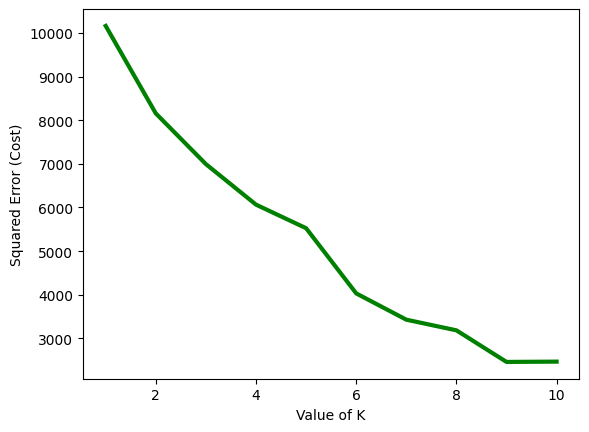

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cost = []
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, init='random', max_iter=20,n_init='auto').fit(imputedDf)
  cost.append(kmeans.inertia_)


plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

### Step 4.2: Performing K-Means Algorithm

In [43]:
kmeans = KMeans(n_clusters=9, max_iter=20, init='random',n_init='auto').fit(imputedDf)

---

## Step 5: Visualization of Clusters

1. Create geopandas dataframe to store clusterNumber and the sensorLocation
2. Plot the locations using Folium

### Step 5.1: Storing clusterNumber and sensorLocation in Geopandas dataframe

In [44]:
import geopandas

loc = locationInfo


x_cord = []
y_cord = []
for l in loc:
   x,y = l.replace("(","").replace(")","").split(" ")
   x_cord.append(float(x))
   y_cord.append(float(y))

geometry = geopandas.points_from_xy(x_cord, y_cord)
geo_df = geopandas.GeoDataFrame(kmeans.labels_, geometry=geometry)
geo_df.columns = ['label','geometry']
geo_df.head()

,label,geometry
0,2,POINT (140.74680 41.81889)
1,0,POINT (140.40220 36.55508)
2,1,POINT (139.11033 36.29749)
3,3,POINT (140.13855 35.61139)
4,5,POINT (139.99336 35.67713)


Create Folium map to view clusters

In [46]:
import folium

map= folium.Map(location= [13.406,80.110], tiles ="StamenTerrain",zoom_start= 9)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

i = 0

#Assign colors for each label on the map and add cluster labels to the plot
for coordinates in geo_df_list:
  if geo_df.label[i] == 0:
    type_color = "green"
  elif geo_df.label[i] == 1:
    type_color = "blue"
  elif geo_df.label[i] == 2:
    type_color = "orange"
  else:
    type_color = "purple"

  map.add_child(folium.Marker(location = coordinates, icon = folium.Icon(color = "%s" % type_color)))

map
